# Árboles de decisión II
## author: Virginia Ordoño Bernier
## date: february 2024

En este ejercicio se aplica el  modelo *Árbol de Decisión* al dataset California Housing (regresión)

### 1. Gestión de datos

#### 1.1 Carga y creación del dataframe

In [21]:
import pandas as pd
import inflection
from sklearn.datasets import fetch_california_housing

# Descarga el conjunto de datos
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convertir los datos en DataFrame y cambiar nombre columnas
df_housing = pd.DataFrame(data=X, columns=housing.feature_names)
df_housing.columns = [inflection.underscore(col.replace(' ', '_').replace('(', '').replace(')', '')) for col in df_housing.columns]

# Agrega target
df_housing['target'] = y

df_housing.head()


,med_inc,house_age,ave_rooms,ave_bedrms,population,ave_occup,latitude,longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### 1.2 Comprobación nulos y tipo de datos

In [22]:
print(f'Filas: {df_housing.shape[0]}')
print(f'{df_housing.isna().sum()}')

Filas: 20640
med_inc       0
house_age     0
ave_rooms     0
ave_bedrms    0
population    0
ave_occup     0
latitude      0
longitude     0
target        0
dtype: int64


In [23]:
df_housing.dtypes

med_inc       float64
house_age     float64
ave_rooms     float64
ave_bedrms    float64
population    float64
ave_occup     float64
latitude      float64
longitude     float64
target        float64
dtype: object

#### 1.3 Correlación de variables

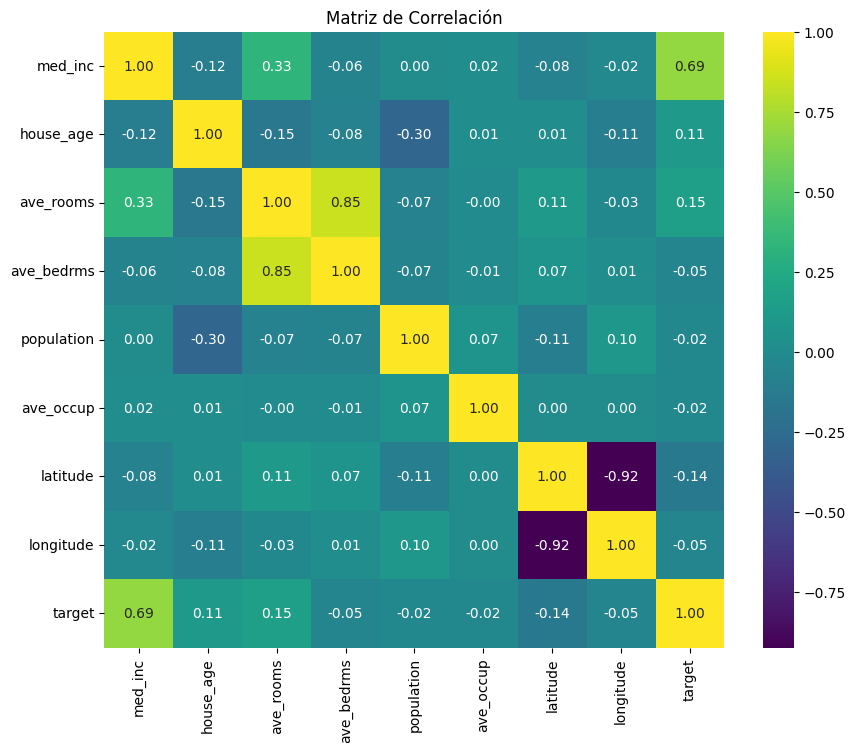

            med_inc  house_age  ave_rooms  ave_bedrms  population  ave_occup  \
med_inc        1.00      -0.12       0.33       -0.06        0.00       0.02   
house_age     -0.12       1.00      -0.15       -0.08       -0.30       0.01   
ave_rooms      0.33      -0.15       1.00        0.85       -0.07      -0.00   
ave_bedrms    -0.06      -0.08       0.85        1.00       -0.07      -0.01   
population     0.00      -0.30      -0.07       -0.07        1.00       0.07   
ave_occup      0.02       0.01      -0.00       -0.01        0.07       1.00   
latitude      -0.08       0.01       0.11        0.07       -0.11       0.00   
longitude     -0.02      -0.11      -0.03        0.01        0.10       0.00   
target         0.69       0.11       0.15       -0.05       -0.02      -0.02   

            latitude  longitude  target  
med_inc        -0.08      -0.02    0.69  
house_age       0.01      -0.11    0.11  
ave_rooms       0.11      -0.03    0.15  
ave_bedrms      0.07       0.01

In [24]:
# Crear una matriz de correlación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_housing.corr()

# Visualizar la matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Imprimir la matriz de correlación con redondeo a 2 decimales
# print("Matriz de Correlación:")
print(correlation_matrix.round(2))

#### 1.4. Lectura correlación de variables

Correlación fuerte positiva:
- target <=> med_inc (ingreso medio). Si el ingreso medio aumenta, la variable objetivo también tiende a aumentar.

Correlación fuerte negativa:
- target <=> house_age, latitude y longitude. Si las variables disminuyen, la variable objetivo tiende a aumentar ligeramente.

Multicolinealidad
- ave_rooms <=>  ave_bedrms (0.85). Esto puede afectar la interpretación de los coeficientes en un modelo de regresión y podría ser algo a tener en cuenta al seleccionar variables predictoras.

Poca correlación
- target <=> population y ave_occup. Pueden no ser tan importantes en la predicción de la variable objetivo.

### 1.5. Preparación de datos para el entrenamiento

In [36]:
from sklearn.model_selection import train_test_split

X = df_housing.drop('target', axis=1)
y = df_housing['target']

# Divide el DataFrame en conjuntos de entrenamiento y prueba 
train, test = train_test_split(df_housing, test_size=0.33, random_state=42)

# Reseteo de índices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Separación características y etiquetas
X_train = train.drop('target', axis=1)  
y_train = train['target']  
X_test = test.drop('target', axis=1)  
y_test = test['target']

print("Conjunto de entrenamiento:")
print(X_train.head()) 

print("\nConjunto de prueba:")
print(X_test.head())  


,med_inc,house_age,ave_rooms,ave_bedrms,population,ave_occup,latitude,longitude,target
0,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
1,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
2,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
3,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
4,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000
...,...,...,...,...,...,...,...,...,...
6807,1.3269,19.0,3.987578,1.153209,1190.0,2.463768,33.20,-117.36,1.66100
6808,2.7361,14.0,4.206612,0.983471,1224.0,3.371901,32.57,-117.07,0.93600
6809,3.8355,15.0,6.419753,1.039781,2626.0,3.602195,38.71,-121.40,1.07000
6810,4.3958,10.0,6.154506,1.013948,3528.0,3.785408,34.09,-117.39,1.30700


## MODELO: ÁRBOL DE DECISIÓN (REGRESIÓN)

#### Selección de mejor profundidad quitando características con poca correlación

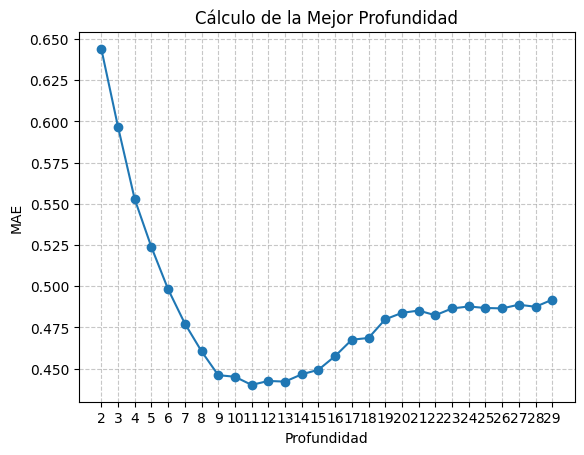

Mejor Profundidad: 11
Menor MAE: 0.44


In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#selected_features = ['med_inc', 'house_age', 'ave_rooms', 'ave_bedrms', 'latitude', 'longitude']

mae_list = []

for i in range(2, 30):
    model = DecisionTreeRegressor(max_depth=i, criterion='absolute_error', random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

min_mae_index = mae_list.index(min(mae_list))
best_depth = range(2, 30)[min_mae_index]
min_mae = min(mae_list)

# Plot mae
plt.plot(range(2, 30), mae_list, marker='o')
plt.title('Cálculo de la Mejor Profundidad')
plt.xlabel('Profundidad')
plt.ylabel('MAE')

# Configurar etiquetas en el eje x para mostrar todos los valores
plt.xticks(range(2, 30))

# Añadir cuadrículas de fondo
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

print(f'Mejor Profundidad: {best_depth}\nMenor MAE: {min_mae:.2f}')


## Contrucción del modelo con la mejor profundidad

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Construcción del modelo
model = DecisionTreeRegressor(criterion='absolute_error', max_depth=best_depth, random_state=0)

# Entrenamiento
# doble [] para convertirlo en un df ya que es solo una columna 
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE en el conjunto de prueba: {round(mae, 2)}')

MAE en el conjunto de prueba: 0.44


## Importancia de las variables

Informe de Importancia de las Variables:
  Características  Importancia
0         med_inc     0.522396
5       ave_occup     0.131897
6        latitude     0.099590
7       longitude     0.097454
2       ave_rooms     0.062380
1       house_age     0.045691
3      ave_bedrms     0.021103
4      population     0.019488


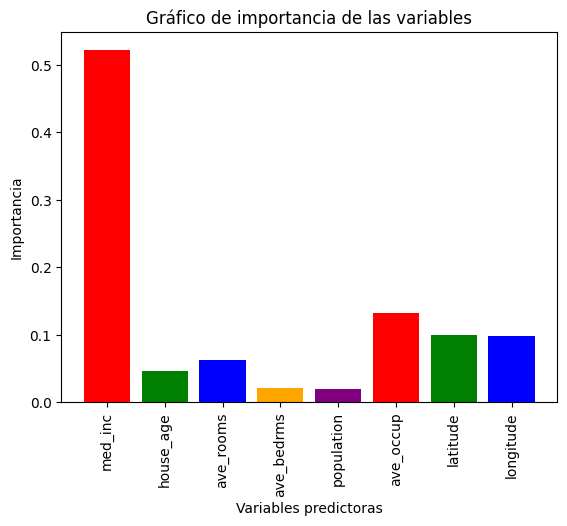

In [28]:
features_names = df_housing.columns[:-1]

# Cargamos la importancia de las características
importances = model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Características':features_names, 'Importancia': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostramos
print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(features_names, importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()

## Visualización del árbol con todas las características

In [29]:
from IPython.display import display
import graphviz
from sklearn.tree import export_graphviz 

# Crear un archivo DOT que representa el árbol de decisión (en este caso se devuelve como cadena)
dot_data = export_graphviz(model, out_file=None,
                    feature_names = features_names,
                    rounded = True, filled = True, special_characters=True)

# Generar el gráfico del árbol de decisión desde el archivo DOT
graph = graphviz.Source(dot_data)

#graph.view("arbol_de_decision")  # Esto guardará el gráfico en un archivo llamado "arbol_de_decision.pdf"
graph